# Stringformatierung

In der Übung kam die Frage auf, wie man den Inhalt von 
von Variablen auch z.B. bei Plots mit Matplotlib verwenden kann

Es handelt sich hier eigentlich nicht um eine Problem im Umgang mit Matplotlib sondern eine grundsätzliche Python Funktionalität
die nicht Teil der Vorlesung war:
Z.B.
* plt.plot($\dots$,label=$\dots$)
* plt.xlabel($\dots$)
* plt.text($\dots$)
erwarten als Argument einen String.

Die Frage ist also, wie bekomme ich den Inhalt einer Variable sinnvoll in einen String?

## Kurzantwort:
Man kann (ab Python 3.6) in Strings auch Variablen verwenden. Dazu schreibt man vor den String ein `f` 
und die Variablen in `{`$\dots$`}`.  
Weiter kann man dann noch durch `:` getrennt angeben wieviel Nachkommastellen angezeigt werden sollen
und mit `e` oder `f` ob die Zahlen wissenschaftlich (z.B. `1e-3`) oder nicht, z.B. `0.001` 
Beispiel:



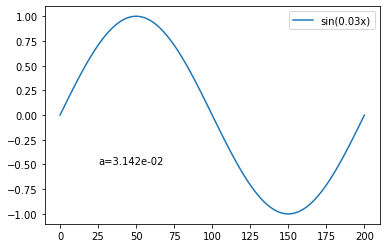

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = np.pi/100
x = np.linspace(0, 2*np.pi/a, 101)

plt.plot(x, np.sin(a*x), label=f'sin({a:.2f}x)')
plt.text(25, -0.5, f'a={a:.3e}')
plt.legend()


# Ausführlich: Es gibt mehrere Möglichkeiten
## Möglichkeit 1: `str()`
Mit der Funktion `str()` kann ich Variablen in einen String umwandeln.  
Weiter kann ich mir zunutze machen, das der `+`-Operator Strings aneinanderhängt.

Beispiel:

In [8]:
x = np.pi
s1 = "Und für x=" + str(x) + " erhalte ich sin(x)=" + str(np.sin(x))
print(s1)

Und für x=3.141592653589793 erhalte ich sin(x)=1.2246467991473532e-16


Wie man sieht ist die Formatierung hier häufig unbefriedigend, 
und man möchte mehr Kontrolle über die Darstellung der Zahlen.

Hierbei helfen die weiteren Möglichkeiten:

## Möglichkeit 2: Formatted String Literals (f-Strings)
Dies ist neueste und wohl eleganteste Möglichkeit.
Allerdings ist sie erst mit Python 3.6 eingeführt worden, auf
älteren Installation wird sie also nicht funktionieren.

f-Strings erkennt man daran, das ihnen ein `f` oder `F` vorangestellt werden.
Dann ist es möglich mit den geschweiften Klammern Variablen oder auch Funktionsaufrufe
in den String aufzunehmen.

Beispiel:

In [3]:
s2 = f"Immer noch wird x als {x} dargestellt"
print(s2)

Immer noch wird x als 3.141592653589793 dargestellt


Dies ist schon leichter zu schreiben und vor allem zu lesen.  
Zusätzlich hat man hier aber auch die Möglichkeit die Formatierung der Zahlenwerte
genau zu steuern.  
Dafür hängt man mit `:` noch einen Formatierungsstring an.

In [4]:
s3 = f"Und für x={x:.4} erhalte ich sin(x)={np.sin(x):.1f} bzw. genauer {np.sin(x):.3e}"
print(s3)

Und für x=3.142 erhalte ich sin(x)=0.0 bzw. genauer 1.225e-16


Wie man hier vielleicht sieht, muss man allerdings aufpassen, dass dann auch noch mathematisch korrekt ist.

Der Formatierungsstring hat dabei die Form:  
**[[fill]align][sign][#][0][width][grouping_option][.precision][type]**  
Die eckigen Klammern `[`$\dots$`]` bedeuten, diese Optionen sind optional, d.h. sie können
müssen aber nicht angegeben werden (ohne die Klammern).  
Im Detail sind die Formatierungsstrings in der Python-Dokumentation unter 
https://docs.python.org/3/library/string.html#formatspec beschrieben,
im Folgenden nur die wichtigsten Optionen:  
**[width][grouping_option][.precision][type]** 

Fangen wir hinten an: 
* `type` wird durch einen Buchstaben angegeben. Dabei spielt der Datentype der entsprechenden Variable eine Rolle:
  * integer: 
    * `d` (default) Integer-Zahl (Basis 10) 
    * `n` wie `d` aber mit lokalem Tausendertrennzeichen
  * float: 
    * `e` Darstellung mit Exponent (z.B. **1.34e-3**) 
    * `f` Darstellung als 'Kommazahl' (z.B. 0.00134) 
    * `g` wählt automatisch zwischen `e` und `f`
* `precision`: Integer Zahl, Anzahl der Nachkommastellen
* `grouping_option`: `_` oder `,` Tausendertrennzeichen " " oder "," idR. besser weglassen 
* `width`: Mindestbreite der Zahl (wird mit Leerzeichen aufgefüllt.

Vielleicht etwas didaktischer findet man dies auch z.B. unter https://www.python-kurs.eu/python3_formatierte_ausgabe.php wobei hier nur die beiden älteren Formatierungsmöglichkeiten besprochen werden:



## Möglichkeit 3: `format()`
Die String-Methode `format()` ähnelt den f-Strings,
allerdings werden hier die einzusetzenden Werte mit `.format()`
an den String angehängt.



In [5]:
s4 = "Und jetzt ist x={:.3f} und sin(x)={:.2e}".format(np.pi, np.sin(np.pi))
print(s4)

Und jetzt ist x=3.142 und sin(x)=1.22e-16


## Möglichkeit 4: *printf()*-Stil mit Modulo-Operator `%`
Diese Methode ist älter und sollte vermieden werden, da hier einige Probleme auftauchen können.  
Die Ähnlichkeit des Syntax zu anderen Programiersprachen (z.B. *C*) macht die Schreibweise aber für viele attraktiv.

Der Platzhalter wird mit `%` geschrieben und die Variablen dann 
mit dem Modulo-Operator `%` an den String angehängt.

In [9]:
s5 ="Und nochmal x=%.2f ergibt %.3e" % (np.pi, np.sin(np.pi))
print(s5)

Und nochmal x=3.14 ergibt 1.225e-16
